In [1]:
from PIL import Image
import os, glob
import numpy as np
from sklearn.model_selection import train_test_split
os.environ["PATH"] += os.pathsep + 'C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v9.0/bin'
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [2]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense

Using TensorFlow backend.


In [3]:
from keras.utils import np_utils

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [5]:
root_dir = "./image/"
categories = ['normal', 'beni', 'negi', 'cheese']
nb_classes = len(categories)
image_size = 50

In [6]:
def draw_model(m):
    SVG(model_to_dot(m, show_shapes=True).create(prog='dot', format='svg'))

In [7]:
def main():
    X_train, X_test, y_train, y_test = np.load("./image/gyudon2.npy")
    X_train = X_train.astype("float") / 256
    X_test =X_test.astype("float") / 256
    y_train = np_utils.to_categorical(y_train, nb_classes)
    y_test = np_utils.to_categorical(y_test, nb_classes)
    model = model_train(X_train, y_train)
    model_eval(model, X_test, y_test)
    
    return model

In [8]:
def build_model(in_shape):
    model = Sequential()
    model.add(Convolution2D(32,3,3, border_mode='same', input_shape = in_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Convolution2D(64,3,3, border_mode='same'))
    model.add(Activation('relu'))
    model.add(Convolution2D(64,3,3))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [9]:
def model_train(X,y):
    model = build_model(X.shape[1:])
    model.fit(X,y, batch_size = 32, epochs = 30)
    hdf5_file = "./image/gyudon-model.hdf5"
    model.save_weights(hdf5_file)
    return model

In [10]:
def model_eval(model, X, y):
    score = model.evaluate(X, y)
    print('loss=', score[0])
    print('accuracy= ', score[1])

In [11]:
if __name__ == "__main__":
    main_model = main()

c:\users\2e313jcp\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(50, 50, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\2e313jcp\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  
c:\users\2e313jcp\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/30
6647/6647 [==============================] - 7s 1ms/step - loss: 0.8499 - acc: 0.8881
Epoch 2/30
6647/6647 [==============================] - 4s 630us/step - loss: 0.2787 - acc: 0.8957 0s - loss: 0.2847 
Epoch 3/30
6647/6647 [==============================] - 4s 615us/step - loss: 0.2010 - acc: 0.9180
Epoch 4/30
6647/6647 [==============================] - 4s 639us/step - loss: 0.1209 - acc: 0.9532
Epoch 5/30
6647/6647 [==============================] - 4s 621us/step - loss: 0.0734 - acc: 0.9729
Epoch 6/30
6647/6647 [==============================] - 4s 632us/step - loss: 0.0513 - acc: 0.9823
Epoch 7/30
6647/6647 [==============================] - 4s 616us/step - loss: 0.0440 - acc: 0.9863
Epoch 8/30
6647/6647 [==============================] - 4s 633us/step - loss: 0.0323 - acc: 0.9901
Epoch 9/30
6647/6647 [==============================] - 4s 633us/step - loss: 0.0334 - acc: 0.9906
Epoch 10/30
6647/6647 [==============================] - 4s 612us/step - loss: 0.0281 - acc:

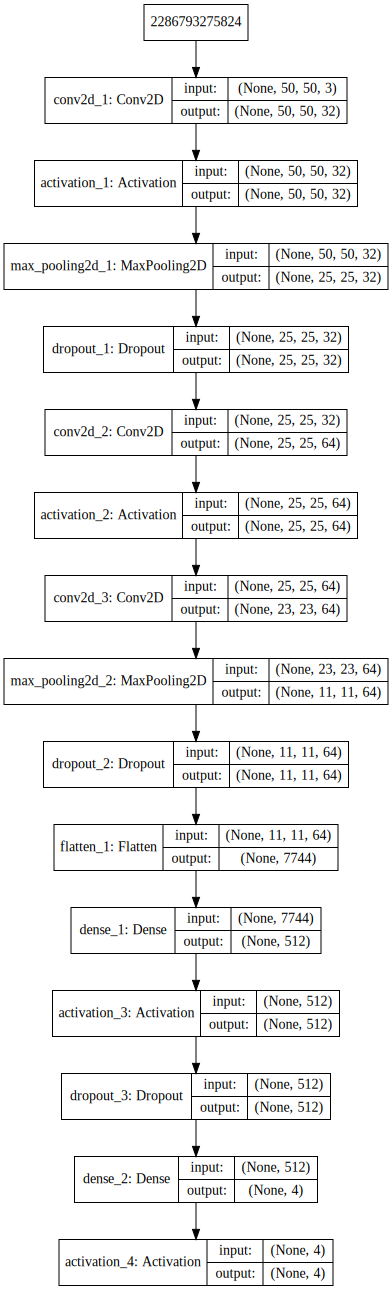

In [12]:
SVG(model_to_dot(main_model, show_shapes=True).create(prog='dot', format='svg'))